In [1]:
! pip3 install imutils

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import imutils
from skimage.metrics import structural_similarity as ssim

In [16]:
# https://raw.githubusercontent.com/advcha/OpenCV-Python/master/images/approx.jpg

img = imutils.url_to_image("https://raw.githubusercontent.com/advcha/OpenCV-Python/master/images/approx.jpg")
img_contours = img.copy()
img_gray_contour = cv.cvtColor(img_contours, cv.COLOR_BGR2GRAY);
image_gray = img_gray_contour.copy()

ret,thresh=cv.threshold(img_gray_contour,127,255,0) #apply threshold to the gray image
contours,hierarchy=cv.findContours(thresh,cv.RETR_TREE,cv.CHAIN_APPROX_SIMPLE)   #get contours


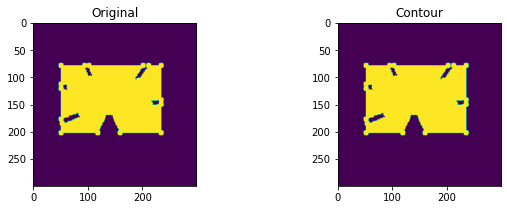

In [20]:
cnt = contours[0]
epsilon=0.01*cv.arcLength(cnt,True)
approx=cv.approxPolyDP(cnt,epsilon,True)

img_gray_contour=cv.drawContours(img_gray_contour, approx, -1, (255,0,2),10)
fig, axs = plt.subplots(1, 2, figsize=(10, 3))
for ax, interp,img in zip(axs, ['Original', 'Contour'],[img,img_gray_contour]):
    ax.imshow(img)
    ax.set_title(interp.capitalize())
    ax.grid(False)
plt.show()